In [12]:
%load_ext autoreload
%autoreload 2

import os, sys
import time
import math
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.preprocessing import MinMaxScaler, PowerTransformer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
def load_results(file):
    rv = []
    with open(file) as results_by_len_file:
        for line in results_by_len_file:
            line = line.strip()
            if (line == "") or (line == "smallsent"):
                continue
            tokens = line.split()
            rv.append([float(tok) for tok in tokens])
    rv = np.array(rv)
    return rv

In [9]:
wt_2_wt_2_baseline  = load_results('./../data/wikitext-2/test.txt.WT2-20201204-202513.eval-by-sent.baseline')
wt_2_wt_2_rnd_tuned = load_results('./../data/wikitext-2/test.txt.WT2-20201204-202513.eval-by-sent.rnd_tuned')
wt_2_penn_baseline  = load_results('./../data/penn/test.txt.WT2-20201204-202513.eval-by-sent.baseline')
wt_2_penn_rnd_tuned = load_results('./../data/penn/test.txt.WT2-20201204-202513.eval-by-sent.rnd_tuned')

r_value: -0.42571807177752324, p_value: 1.2578349496541339e-127


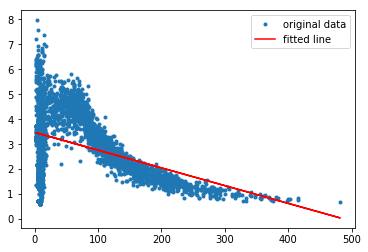

In [25]:
x, y = wt_2_wt_2_baseline[:, 0], wt_2_wt_2_baseline[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

r_value: -0.4573119371487552, p_value: 2.0904110369176048e-149


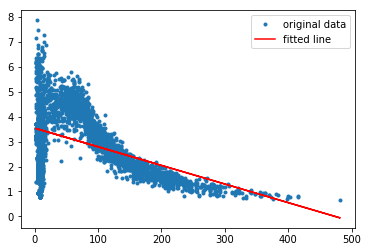

In [21]:
x, y = wt_2_wt_2_rnd_tuned[:, 0], wt_2_wt_2_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

r_value: -0.04171943369558903, p_value: 0.010503689672699169


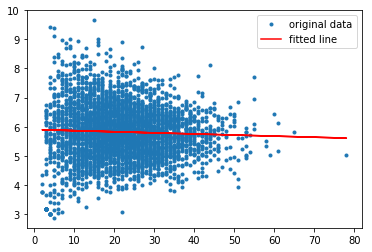

In [22]:
x, y = wt_2_penn_baseline[:, 0], wt_2_penn_baseline[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

r_value: -0.041978212435232906, p_value: 0.010033384374007033


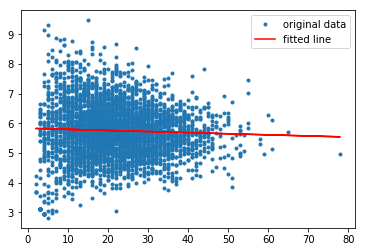

In [23]:
x, y = wt_2_penn_rnd_tuned[:, 0], wt_2_penn_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

r_value: 0.4174942621672688, p_value: 2.5052501497451285e-122


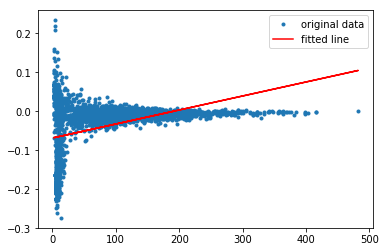

In [26]:
x, y = wt_2_wt_2_baseline[:, 0], wt_2_wt_2_baseline[:, 1] - wt_2_wt_2_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

r_value: -0.01398659881684059, p_value: 0.3911615136320252


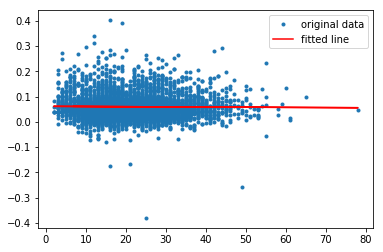

In [28]:
x, y = wt_2_penn_baseline[:, 0], wt_2_penn_baseline[:, 1] - wt_2_penn_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

r_value: -0.041573482471599726, p_value: 0.025396116621049805


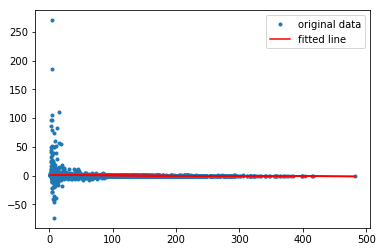

In [30]:
x, y = wt_2_wt_2_baseline[:, 0], wt_2_wt_2_baseline[:, 2] - wt_2_wt_2_rnd_tuned[:, 2]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

r_value: -0.0899200922018845, p_value: 3.315780297056667e-08


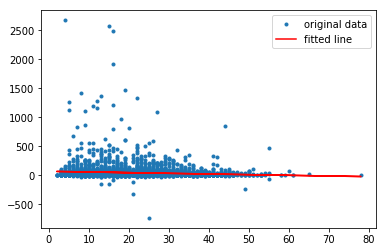

In [31]:
x, y = wt_2_penn_baseline[:, 0], wt_2_penn_baseline[:, 2] - wt_2_penn_rnd_tuned[:, 2]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [35]:
penn_wt_2_baseline  = load_results('./../data/wikitext-2/test.txt.penn-small-batch-20201125-154421.eval-by-sent.baseline')
penn_wt_2_rnd_tuned = load_results('./../data/wikitext-2/test.txt.penn-small-batch-20201125-154421.eval-by-sent.rnd_tuned')
penn_penn_baseline  = load_results('./../data/penn/test.txt.penn-small-batch-20201125-154421.eval-by-sent.baseline')
penn_penn_rnd_tuned = load_results('./../data/penn/test.txt.penn-small-batch-20201125-154421.eval-by-sent.rnd_tuned')

r_value: 0.1697083772138358, p_value: 4.014910322526933e-20


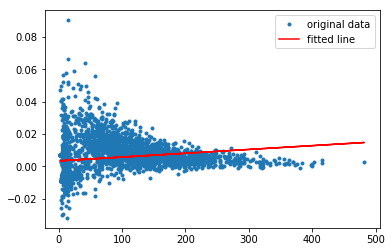

In [36]:
x, y = penn_wt_2_baseline[:, 0], penn_wt_2_baseline[:, 1] - penn_wt_2_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

r_value: -0.013019521564902384, p_value: 0.4247448538756301


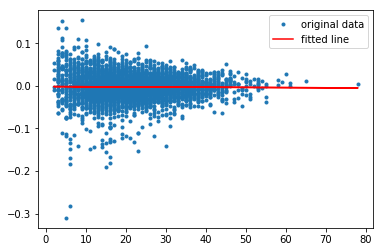

In [37]:
x, y = penn_penn_baseline[:, 0], penn_penn_baseline[:, 1] - penn_penn_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

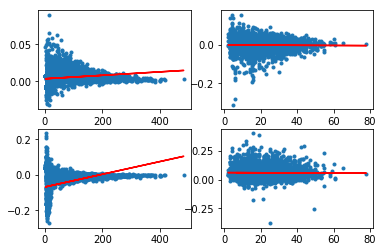

In [44]:
fig, axs = plt.subplots(2, 2)

x, y = penn_wt_2_baseline[:, 0], penn_wt_2_baseline[:, 1] - penn_wt_2_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
axs[0, 0].plot(x, y, '.', label='original data')
axs[0, 0].plot(x, intercept + slope*x, 'r')

x, y = penn_penn_baseline[:, 0], penn_penn_baseline[:, 1] - penn_penn_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
axs[0, 1].plot(x, y, '.', label='original data')
axs[0, 1].plot(x, intercept + slope*x, 'r')

x, y = wt_2_wt_2_baseline[:, 0], wt_2_wt_2_baseline[:, 1] - wt_2_wt_2_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
axs[1, 0].plot(x, y, '.', label='original data')
axs[1, 0].plot(x, intercept + slope*x, 'r')

x, y = wt_2_penn_baseline[:, 0], wt_2_penn_baseline[:, 1] - wt_2_penn_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
axs[1, 1].plot(x, y, '.', label='original data')
axs[1, 1].plot(x, intercept + slope*x, 'r')

fig.show()
plt.savefig('./eval_by_length1.pdf')


In [73]:
from scipy.interpolate import Rbf
from scipy.stats import gaussian_kde

r_value: 0.1697083772138358, p_value: 4.014910322526933e-20


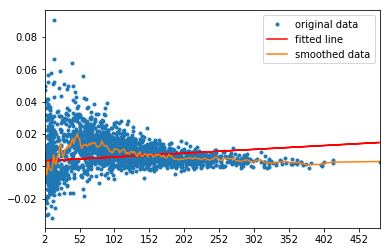

In [66]:
x, y = penn_wt_2_baseline[:, 0], penn_wt_2_baseline[:, 1] - penn_wt_2_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("r_value: %s, p_value: %s" % (r_value, p_value))
#plt.plot(x, y, '.', label='original data')
x_min, x_max = min(x), max(x)
y_min, y_max = min(y), max(y)
plt.plot(x, y, '.', label='original data')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step=50))
#plt.ylim(y_min, y_max)
rbf = Rbf(x, y, smooth=100.0)
xi = np.linspace(x_min, x_max, 300)
plt.plot(xi, rbf(xi), label="smoothed data")
plt.legend()
plt.show()

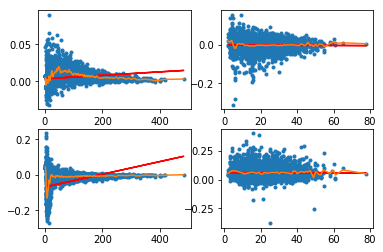

In [72]:
fig, axs = plt.subplots(2, 2)

x, y = penn_wt_2_baseline[:, 0], penn_wt_2_baseline[:, 1] - penn_wt_2_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_min, x_max = min(x), max(x)
rbf = Rbf(x, y, smooth=100.0)
xi = np.linspace(x_min, x_max, 300)
axs[0, 0].plot(x, y, '.', label='original data')
axs[0, 0].plot(x, intercept + slope*x, 'r')
axs[0, 0].plot(xi, rbf(xi), label="smoothed data")

x, y = penn_penn_baseline[:, 0], penn_penn_baseline[:, 1] - penn_penn_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_min, x_max = min(x), max(x)
rbf = Rbf(x, y, smooth=100.0)
xi = np.linspace(x_min, x_max, 300)
axs[0, 1].plot(x, y, '.', label='original data')
axs[0, 1].plot(x, intercept + slope*x, 'r')
axs[0, 1].plot(xi, rbf(xi), label="smoothed data")

x, y = wt_2_wt_2_baseline[:, 0], wt_2_wt_2_baseline[:, 1] - wt_2_wt_2_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_min, x_max = min(x), max(x)
rbf = Rbf(x, y, smooth=100.0)
xi = np.linspace(x_min, x_max, 300)
axs[1, 0].plot(x, y, '.', label='original data')
axs[1, 0].plot(x, intercept + slope*x, 'r')
axs[1, 0].plot(xi, rbf(xi), label="smoothed data")

x, y = wt_2_penn_baseline[:, 0], wt_2_penn_baseline[:, 1] - wt_2_penn_rnd_tuned[:, 1]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
x_min, x_max = min(x), max(x)
rbf = Rbf(x, y, smooth=100.0)
xi = np.linspace(x_min, x_max, 300)
axs[1, 1].plot(x, y, '.', label='original data')
axs[1, 1].plot(x, intercept + slope*x, 'r')
axs[1, 1].plot(xi, rbf(xi), label="smoothed data")

fig.show()
plt.savefig('./eval_by_length1.pdf')


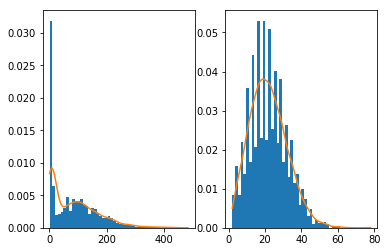

In [80]:
fig, axs = plt.subplots(1, 2)

x = penn_wt_2_baseline[:, 0]
x_min, x_max = min(x), max(x)
xi = np.linspace(x_min, x_max, 300)
kde = stats.gaussian_kde(x)
axs[0].hist(x, density=True, bins=50)
axs[0].plot(xi, kde.pdf(xi))

x = penn_penn_baseline[:, 0]
x_min, x_max = min(x), max(x)
xi = np.linspace(x_min, x_max, 300)
kde = stats.gaussian_kde(x)
axs[1].hist(x, density=True, bins=50)
axs[1].plot(xi, kde.pdf(xi))

fig.show()
plt.savefig('./eval_by_length2.pdf')